In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scipy
from scipy.stats import norm
from scipy.stats import f
from scipy.stats import chi2

In [2]:
# ПУНКТ 1

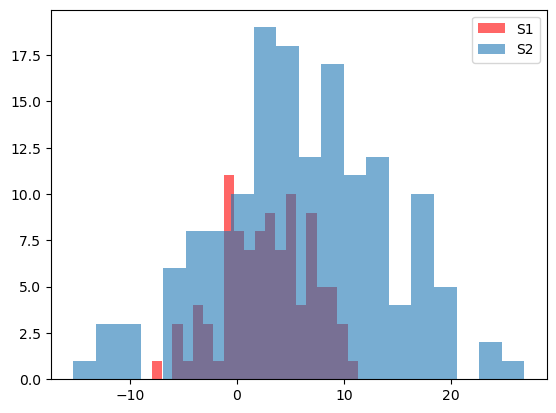

In [3]:
mu1=3
sigma1=4
size1=100
S1=np.random.normal(mu1,sigma1,size1)

mu2=5
sigma2=9
size2=150
S2=np.random.normal(mu2,sigma2,size2)

minn1=min(S1)
maxx1=max(S1)
#print(minn1,maxx1)

minn2=min(S2)
maxx2=max(S2)
#print(minn2,maxx2)

plt.hist(S1, bins=20, alpha=0.6, color='r', label="S1")
plt.hist(S2, bins=20, alpha=0.6, label="S2")
plt.legend()

In [4]:
dispS1=np.var(S1, ddof=1)
dispS2=np.var(S2, ddof=1)
print("disp S1 = ", dispS1, "   disp S2 = ", dispS2)

maxDisp=0
minDisp=0
k1=0  # число степеней свободы большей исправленной дисперсии
k2=0  # число степеней свободы меньшей исправленной дисперсии
if dispS1>dispS2:
    maxDisp=dispS1
    minDisp=dispS2
    k1=size1-1
    k2=size2-1
else:
    maxDisp=dispS2
    minDisp=dispS1
    k1=size2-1
    k2=size1-1

print("k1 = ",k1,"   k2 = ",k2)

disp S1 =  16.788455075660057    disp S2 =  63.09976684321202
k1 =  149    k2 =  99


In [5]:
F_nabl=maxDisp / minDisp
def res(alpha):  
    F_kr=scipy.f.ppf(q=1-alpha, dfn=k1, dfd=k2)  # F_критическое  (по таблице Фишера-Снедекора)
    print("ПРИ УРОВНЕ ЗНАЧИМОСТИ alpha =",alpha)
    print("F_nabl = ",F_nabl)
    print("F_kr = ",F_kr)
    if F_nabl<F_kr:
        print("Нет оснований отвергнуть нулевую гипотезу")
    else:
        print("Нулевая гипотеза отвергается")

print("ПРИ КОНКУРИРУЮЩЕЙ ГИПОТЕЗЕ D(X) > D(Y):")
res(0.05)
print()
print("ПРИ КОНКУРИРУЮЩЕЙ ГИПОТЕЗЕ D(X) != D(Y):")
res(0.025)

ПРИ КОНКУРИРУЮЩЕЙ ГИПОТЕЗЕ D(X) > D(Y):
ПРИ УРОВНЕ ЗНАЧИМОСТИ alpha = 0.05
F_nabl =  3.7585213504662627
F_kr =  1.3610015887652556
Нулевая гипотеза отвергается

ПРИ КОНКУРИРУЮЩЕЙ ГИПОТЕЗЕ D(X) != D(Y):
ПРИ УРОВНЕ ЗНАЧИМОСТИ alpha = 0.025
F_nabl =  3.7585213504662627
F_kr =  1.444601941210317
Нулевая гипотеза отвергается


In [6]:
# ПУНКТ 2

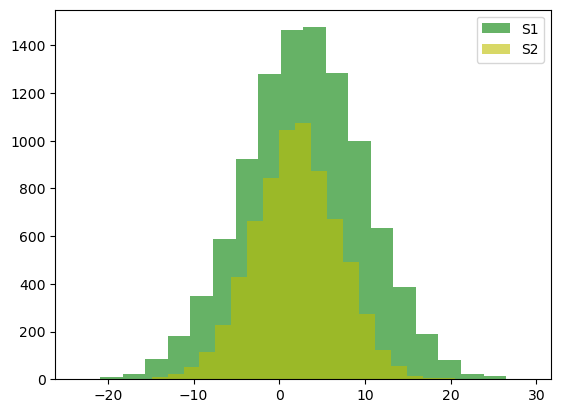

In [7]:
mu1=3
sigma1=7
size1=10000
S1=np.random.normal(mu1,sigma1,size1)

mu2=2
sigma2=5
size2=7000
S2=np.random.normal(mu2,sigma2,size2)

plt.hist(S1, bins=20, alpha=0.6, color='g', label='S1')
plt.hist(S2, bins=20, alpha=0.6, color='y', label='S2')

plt.legend()

In [8]:
dispS1=np.var(S1, ddof=1)
dispS2=np.var(S2, ddof=1)
print("disp S1 =", dispS1,"   disp S2 =", dispS2)

midS1=np.mean(S1)
midS2=np.mean(S2)
print("mid S1 =", midS1,"   mid S2 =", midS2)

disp S1 = 49.04660931704145    disp S2 = 24.443779937523384
mid S1 = 2.9449819456012496    mid S2 = 1.98821458664475


In [9]:
Z_nabl=(midS1-midS2)/(np.sqrt((dispS1/size1)+(dispS2/size2)))

alpha=0.05

Z_kr=scipy.norm.ppf((1-alpha)/2)

In [10]:
if midS1!=midS2:
    print("ПРИ КОНКУРИРУЮЩЕЙ ГИПОТЕЗЕ M(X) != M(Y):")
    print("Z_nabl =",Z_nabl)
    print("Z_kr =",Z_kr)
    if abs(Z_nabl)<Z_kr:
        print("Нет оснований отвергнуть нулевую гипотезу")
    elif abs(Z_nabl)>Z_kr:
         print("Нулевую гипотезу отвергают")
print()
if midS1>midS2:
    print("ПРИ КОНКУРИРУЮЩЕЙ ГИПОТЕЗЕ M(X) > M(Y):")   
    Z_kr=scipy.norm.ppf((1-2*alpha)/2)
    print("Z_nabl =",Z_nabl)
    print("Z_kr =",Z_kr)
    if Z_nabl<Z_kr:
        print("Нет оснований отвергнуть нулевую гипотезу")
    elif Z_nabl>Z_kr:
        print("Нулевую гипотезу отвергают")
        
if midS1<midS2:
    print("ПРИ КОНКУРИРУЮЩЕЙ ГИПОТЕЗЕ M(X) < M(Y):")
    Z_kr=scipy.norm.ppf((1-2*alpha)/2)
    print("Z_nabl =",Z_nabl)
    print("Z_kr =",Z_kr)
    if Z_nabl>-Z_kr:
        print("Нет оснований отвергнуть нулевую гипотезу")
    elif Z_nabl<-Z_kr:
        print("Нулевую гипотезу отвергают")

ПРИ КОНКУРИРУЮЩЕЙ ГИПОТЕЗЕ M(X) != M(Y):
Z_nabl = 10.441282722029415
Z_kr = -0.06270677794321385
Нулевую гипотезу отвергают

ПРИ КОНКУРИРУЮЩЕЙ ГИПОТЕЗЕ M(X) > M(Y):
Z_nabl = 10.441282722029415
Z_kr = -0.12566134685507402
Нулевую гипотезу отвергают


In [11]:
# ПУНКТ 3

In [12]:
sigma=12
mu1, size1=1, 50
mu2, size2=2, 60
mu3, size3=7, 70
mu4, size4=12, 80
mu5, size5=21, 90

k_i=[]  #число степеней свободы
disp_i=[]

S1=np.random.normal(mu1,sigma,size1)
k_i.append(size1-1)
disp_i.append(np.var(S1,ddof=1))

S2=np.random.normal(mu2,sigma,size2)
k_i.append(size2-1)
disp_i.append(np.var(S2,ddof=1))

S3=np.random.normal(mu3,sigma,size3)
k_i.append(size3-1)
disp_i.append(np.var(S3,ddof=1))

S4=np.random.normal(mu4,sigma,size4)
k_i.append(size4-1)
disp_i.append(np.var(S4,ddof=1))

S5=np.random.normal(mu5,sigma,size5)
k_i.append(size5-1)
disp_i.append(np.var(S5,ddof=1))

k=0
for elem in k_i:
    k+=elem

disp=0
for i in range(5):
    disp+=(k_i[i]*disp_i[i])
disp/=k

alpha=0.05

In [13]:
chi2_kr=chi2.ppf(1-alpha, 4)   # 4=5-1
print("Критическое значение хи квадрат при a=0.05 и 5 выборках:",chi2_kr)

Критическое значение хи квадрат при a=0.05 и 5 выборках: 9.487729036781154


In [14]:
sum=0
for i in range(5):
    sum+=(k_i[i]*np.log10(disp_i[i]))
    
V=2.303*(k*np.log10(disp) - sum)
print("V =",V)

V = 2.370349525775391


In [15]:
if V<chi2_kr:
    print("Нет основавний отвергнуть нулевую гипотезу, так как V < chi2_kr")
else:
    sum=0
    for i in range(5):
        sum+=(1/k_i[i])
    C=(1+1/(3*4))*(sum - 1/k)
    B_nabl=V/C
    print("B_nabl =",B_nabl)
    if B_nabl<chi2_kr:
        print("Нет основавний отвергнуть нулевую гипотезу, так как B_nabl < chi2_kr")
    else:
        print("Нулевая гипотеза отвергается, так как  B_nabl > chi2_kr")
        

Нет основавний отвергнуть нулевую гипотезу, так как V < chi2_kr
